In [4]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_data,train_labels),(test_data,test_labels)=fashion_mnist.load_data()

In [5]:
train_data.shape,train_labels.shape,test_data.shape,test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [6]:
print("Training data: ",train_data[0])
print("Training labels: ",train_labels[0])

Training data:  [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   

In [7]:
train_data[0].shape,train_labels[0].shape

((28, 28), ())

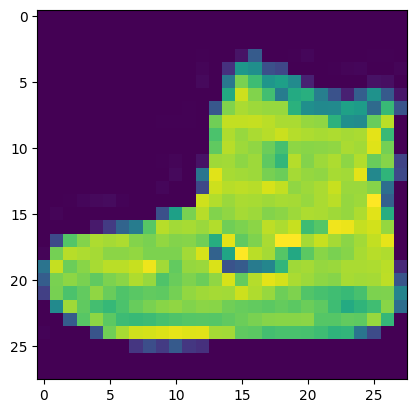

In [8]:
import matplotlib.pyplot as plt
plt.imshow(train_data[0])

In [9]:
class_name=["T-shirt","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
len(class_name)

10

Text(0.5, 1.0, 'Bag')

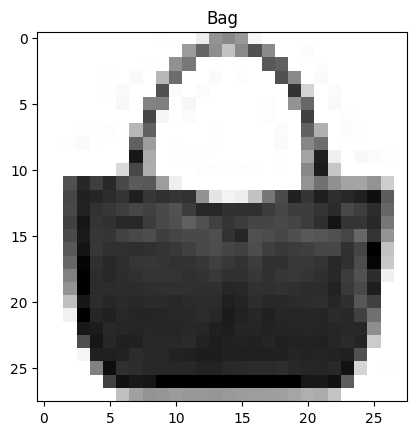

In [10]:
plt.imshow(train_data[100],cmap=plt.cm.binary)
plt.title(class_name[train_labels[100]])

Plot multiple random images

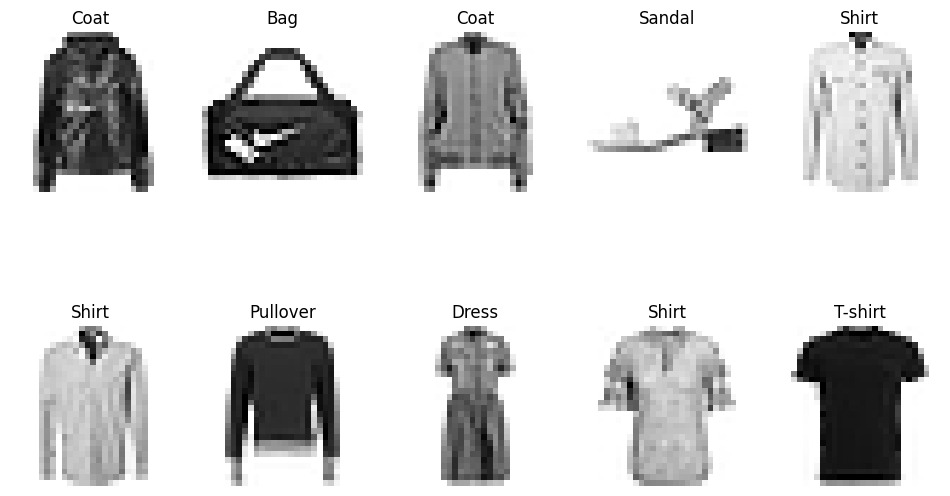

In [11]:
import random
plt.figure(figsize=(12,7))
for i in range(10):
    ax=plt.subplot(2,5,i+1)
    random_index=random.choice(range(len(train_data)))
    plt.imshow(train_data[random_index],cmap=plt.cm.binary)
    plt.title(class_name[train_labels[random_index]])
    plt.axis(False)

In [12]:
train_data_flatten=train_data.reshape(train_data.shape[0],28*28)
test_data_flatten=test_data.reshape(test_data.shape[0],28*28)
test_labels_one_hot=tf.one_hot(test_labels,depth=10)
train_labels_one_hot=tf.one_hot(train_labels,depth=10)
train_data[0].shape, train_data_flatten.shape,train_data.shape[0]

tf.random.set_seed(42)
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu',input_shape=(28*28,)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])
model_2.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)
model_2.fit(train_data_flatten,train_labels_one_hot,epochs=10,validation_data=(test_data_flatten,test_labels_one_hot))

Epoch 1/10


C:\Users\darius\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.0985 - loss: 2.3114 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0973 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0973 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0973 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0973 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0973 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0973 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0973 - loss: 2.3028 - val_accurac

The better variation of the model

In [13]:
tf.random.set_seed(42)

model=tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28, 28)),
    tf.keras.layers.Flatten(),
    # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax') 
    #output layer is 10 because we have 10 classes 
    # softmax gives us probabilities for each class
])

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)
non_normalize_data=model.fit(train_data,train_labels,epochs=10,validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.0990 - loss: 2.3315 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0974 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0973 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0973 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0973 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0973 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0973 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0973 - loss: 2.3028 - 

In [14]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │         3,140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │            50 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

In [15]:
train_data.min(),train_data.max()

(np.uint8(0), np.uint8(255))

We are going to scale or normalized the data to be between 0 and 1

In [16]:
train_data=train_data/255.0
test_data=test_data/255.0
train_data.min(),train_data.max()

(np.float64(0.0), np.float64(1.0))

In [17]:
tf.random.set_seed(42)

model3=tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28,28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

model3.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)
norm_history=model3.fit(train_data,train_labels,epochs=10,validation_data=(test_data,test_labels))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.3689 - loss: 1.5826 - val_accuracy: 0.5427 - val_loss: 1.2230
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5788 - loss: 1.0865 - val_accuracy: 0.6209 - val_loss: 1.0156
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6448 - loss: 0.9552 - val_accuracy: 0.6891 - val_loss: 0.9157
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7036 - loss: 0.8630 - val_accuracy: 0.7231 - val_loss: 0.8277
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7394 - loss: 0.7668 - val_accuracy: 0.7448 - val_loss: 0.7651
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7538 - loss: 0.7224 - val_accuracy: 0.7530 - val_loss: 0.7359
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7589 - loss: 0.6981 - val_accuracy: 0.7574 - val_loss: 0.7178
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7626 - loss: 0.6811 - 

<Axes: title={'center': 'Model 2: Non-normalized data'}>

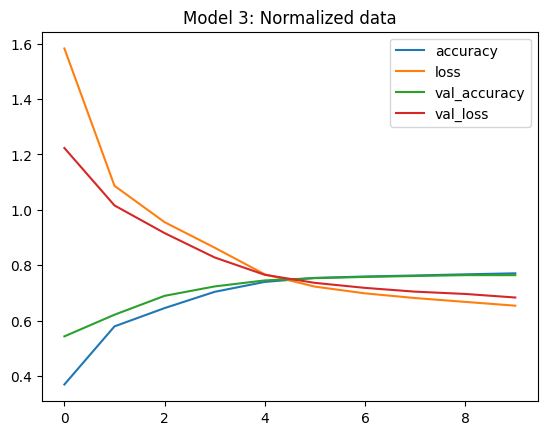

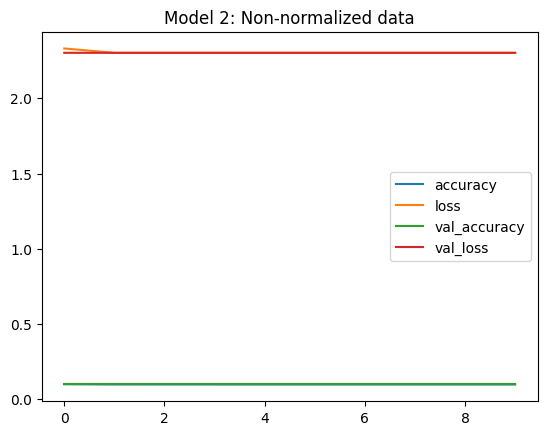

In [18]:
import pandas as pd
pd.DataFrame(norm_history.history).plot(title="Model 3: Normalized data")
pd.DataFrame(non_normalize_data.history).plot(title="Model 2: Non-normalized data")

In [19]:
tf.random.set_seed(42)

model_4=tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28,28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])
model_4.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)
learning=tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-3 * 10**(epoch/20))
model_4_history=model_4.fit(train_data,train_labels,epochs=40,validation_data=(test_data,test_labels),callbacks=[learning])

Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.4432 - loss: 1.4833 - val_accuracy: 0.6564 - val_loss: 1.0034 - learning_rate: 0.0010
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7096 - loss: 0.7673 - val_accuracy: 0.7569 - val_loss: 0.6768 - learning_rate: 0.0011
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7779 - loss: 0.6285 - val_accuracy: 0.7848 - val_loss: 0.6230 - learning_rate: 0.0013
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7965 - loss: 0.5923 - val_accuracy: 0.7955 - val_loss: 0.6006 - learning_rate: 0.0014
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8039 - loss: 0.5746 - val_accuracy: 0.8030 - val_loss: 0.5877 - learning_rate: 0.0016
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8078 - loss: 0.5649 - val_accuracy: 0.8043 - val_loss: 0.5841 - learning_rate: 0.0018
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8091 - l

In [20]:
tf.random.set_seed(42)

model_5=tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28,28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(50,activation='relu'),
    tf.keras.layers.Dense(50,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])
model_5.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

model_5_history=model_5.fit(train_data,train_labels,epochs=20,validation_data=(test_data,test_labels))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8162 - loss: 0.5211 - val_accuracy: 0.8438 - val_loss: 0.4313
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8620 - loss: 0.3832 - val_accuracy: 0.8587 - val_loss: 0.3862
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8734 - loss: 0.3462 - val_accuracy: 0.8601 - val_loss: 0.3823
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8814 - loss: 0.3227 - val_accuracy: 0.8627 - val_loss: 0.3773
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8871 - loss: 0.3052 - val_accuracy: 0.8675 - val_loss: 0.3687
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8917 - loss: 0.2913 - val_accuracy: 0.8739 - val_loss: 0.3534
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8957 - loss: 0.2797 - val_accuracy: 0.8727 - val_loss: 0.3595
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8999 - loss: 0.2697 - 

In [21]:
loss, accuracy = model_5.evaluate(test_data, test_labels)
loss,accuracy

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8630 - loss: 0.4522


(0.45221200585365295, 0.8629999756813049)

Text(0.5, 1.0, 'Finding the ideal learning rate')

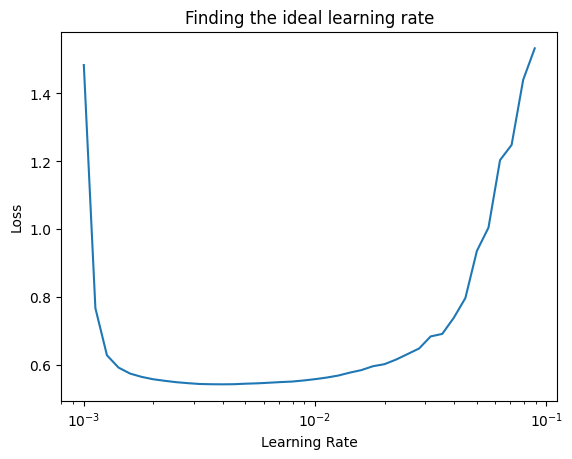

In [22]:
import numpy as np
lrs=1e-3*10**(np.arange(40)/20)
plt.semilogx(lrs,model_4_history.history['loss'])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [23]:

import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)


Our model outputs a list of prediction probabilities, meaning, it outputs a number for how likely it thinks a particular class is to be the label.

The higher the number in the prediction probabilities list, the more likely the model believes that is the right class.

In [24]:
y_probs=model3.predict(test_data)
y_probs[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step


array([[4.99502024e-13, 9.88588592e-21, 4.70056343e-18, 8.99758631e-16,
        4.96373123e-15, 2.52382874e-01, 1.50283203e-10, 8.89040679e-02,
        1.36963881e-05, 6.58699393e-01],
       [1.28242784e-04, 3.55199845e-26, 9.43794012e-01, 5.67023895e-09,
        2.53024623e-02, 2.96087075e-13, 3.07752769e-02, 4.06754098e-19,
        3.20474669e-08, 4.66533034e-10],
       [4.85064648e-03, 9.35618043e-01, 2.51431426e-04, 5.47262989e-02,
        3.95109266e-04, 1.23714656e-03, 1.98501372e-03, 8.13803868e-04,
        1.03546874e-04, 1.89395087e-05],
       [5.97780477e-03, 9.27240849e-01, 3.10946431e-04, 6.13795407e-02,
        4.67462960e-04, 1.25369383e-03, 2.41269986e-03, 8.24330666e-04,
        1.12010654e-04, 2.06771128e-05],
       [1.77093178e-01, 5.91040177e-08, 2.42941767e-01, 2.30592377e-02,
        8.13833997e-02, 7.18706133e-07, 4.75314558e-01, 2.76787873e-08,
        2.05110482e-04, 1.93282904e-06]], dtype=float32)

In [25]:
y_probs[0].argmax(),class_name[y_probs[0].argmax()]

(np.int64(9), 'Ankle boot')

PRediction probs for the highest numbers from test data 0: 9 an the image is Ankle boot
PRediction probs for the highest numbers from test data 1: 2 an the image is Pullover
PRediction probs for the highest numbers from test data 2: 1 an the image is Trouser
PRediction probs for the highest numbers from test data 3: 1 an the image is Trouser
PRediction probs for the highest numbers from test data 4: 6 an the image is Shirt
PRediction probs for the highest numbers from test data 5: 1 an the image is Trouser
PRediction probs for the highest numbers from test data 6: 4 an the image is Coat
PRediction probs for the highest numbers from test data 7: 6 an the image is Shirt
PRediction probs for the highest numbers from test data 8: 5 an the image is Sandal
PRediction probs for the highest numbers from test data 9: 7 an the image is Sneaker
PRediction probs for the highest numbers from test data 10: 2 an the image is Pullover
PRediction probs for the highest numbers from test data 11: 5 an th

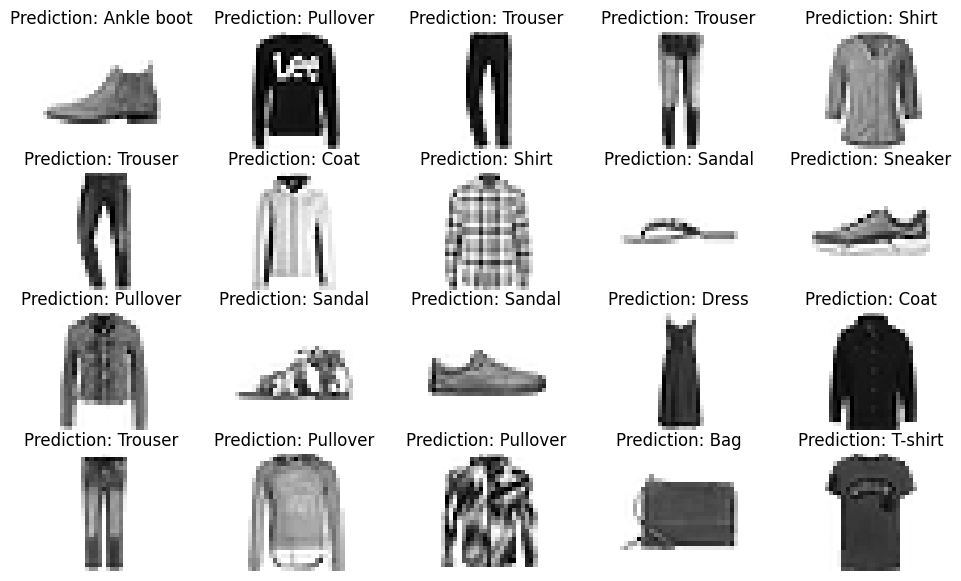

In [26]:
plt.figure(figsize=(12,7))
for i in range(20):
    print(f"PRediction probs for the highest numbers from test data {i}: {y_probs[i].argmax()} an the image is {class_name[y_probs[i].argmax()]}")
    plt.subplot(4,5,i+1)
    plt.imshow(test_data[i],cmap=plt.cm.binary)
    plt.title(f"Prediction: {class_name[y_probs[i].argmax()]}")
    plt.axis(False)

In [27]:
y_preds=y_probs.argmax(axis=1)
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [28]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(test_labels,y_preds)

array([[742,  13,   9, 141,  12,   2,  72,   0,   9,   0],
       [  9, 930,   0,  49,   2,   3,   7,   0,   0,   0],
       [ 24,   1, 591,  27, 169,   1, 182,   0,   5,   0],
       [ 27,  26,   1, 818,  39,  18,  53,   2,  16,   0],
       [  2,   0, 142,  68, 673,   2,  81,   0,  32,   0],
       [  0,   0,   0,   1,   0, 907,   0,  49,   4,  39],
       [172,   6, 186, 126, 243,   1, 254,   0,  12,   0],
       [  0,   0,   0,   0,   0,  37,   0, 924,   0,  39],
       [  0,   1,   1,  27,  42,  13,   7,   4, 905,   0],
       [  0,   0,   1,   0,   0,  39,   0,  66,   0, 894]])

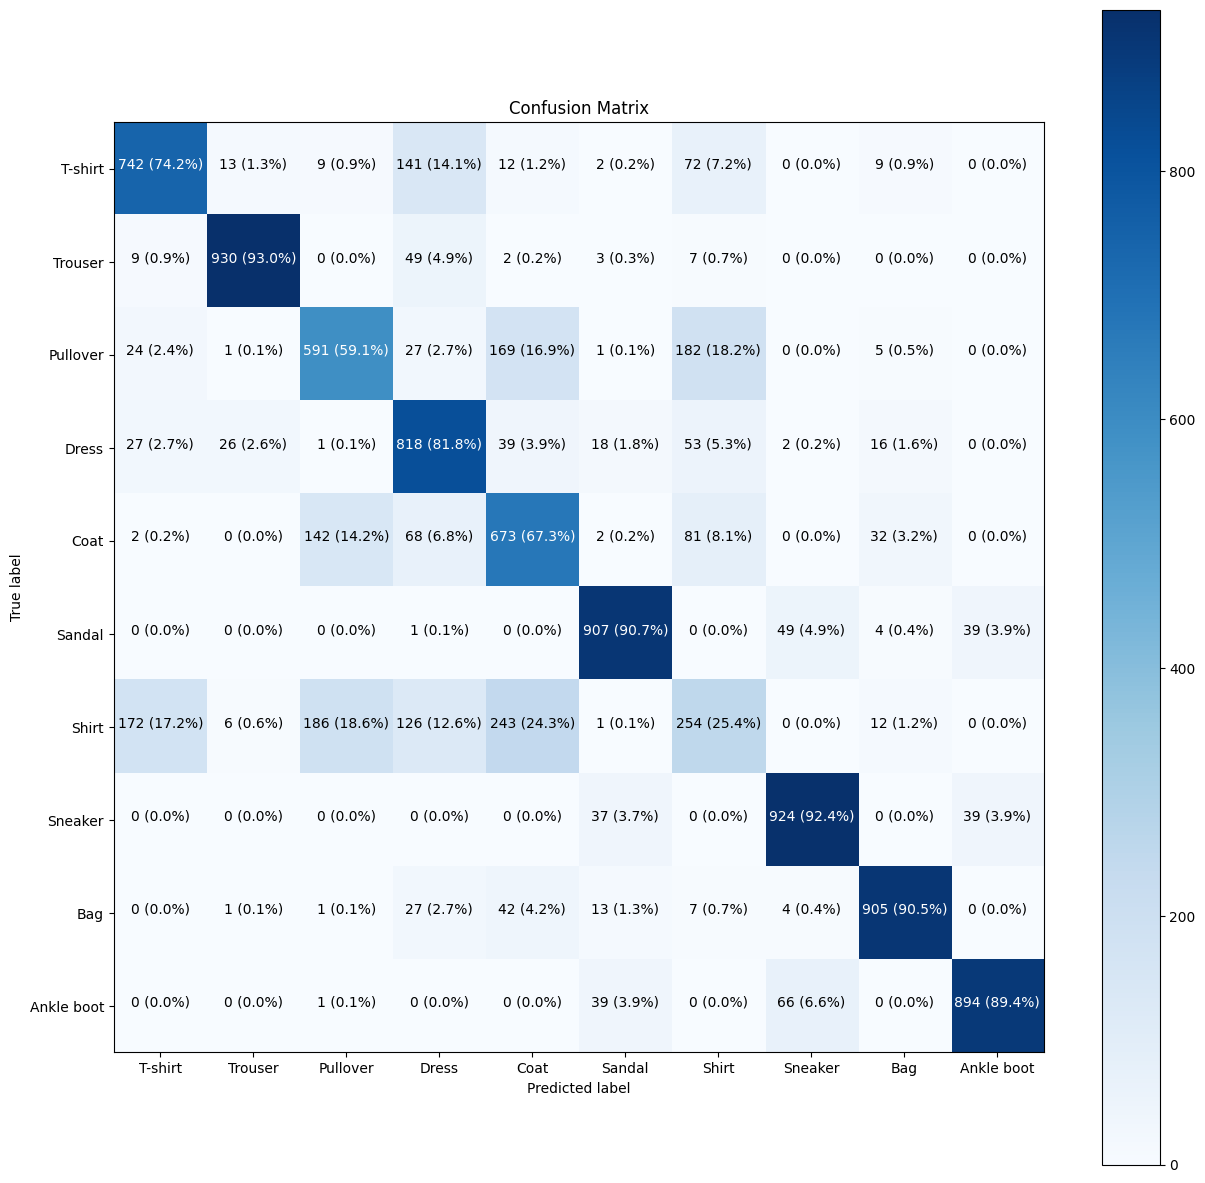

In [29]:
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_name,
                      figsize=(15,15),
                      text_size=10)

In [30]:
import random 
def plot_random_images(model,images,true_labels,classes):
    plt.figure(figsize=(5,5))
    i=random.choice(range(0,len(images)))
    
    target_images=images[i]
    true_labels=classes[true_labels[i]]
    pred_prods=model.predict(target_images.reshape(1,28,28))
    pred_label=classes[pred_prods.argmax()]
    
    plt.imshow(target_images,cmap=plt.cm.binary)
   
    if pred_label==true_labels:
        color="green"
    else:
        color="red"
        
    plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(
        pred_label,
        100*tf.reduce_max(pred_prods),
        true_labels
    ),color=color)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


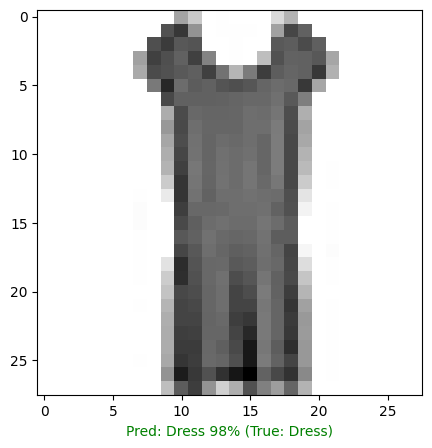

In [31]:
plot_random_images(model_5,test_data,test_labels,class_name)

In [32]:
model_5.layers

[<Flatten name=flatten_3, built=True>,
 <Dense name=dense_12, built=True>,
 <Dense name=dense_13, built=True>,
 <Dense name=dense_14, built=True>]

In [33]:
weight,bias=model_5.layers[1].get_weights()
weight.shape,bias.shape

((784, 50), (50,))

<Axes: title={'center': 'Model 3: Normalized data'}>

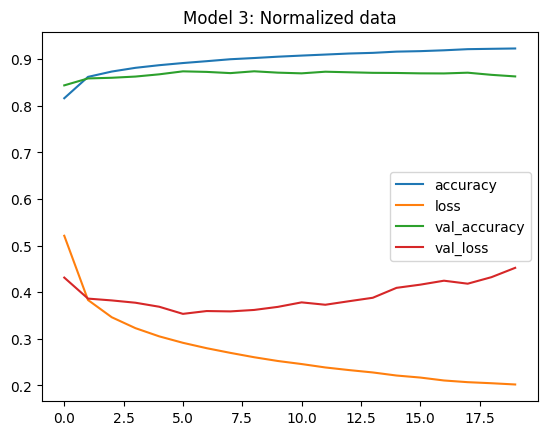

In [34]:
import pandas as pd
pd.DataFrame(model_5_history.history).plot(title="Model 3: Normalized data")
